In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
df = pd.read_csv('student_data.csv')

# EXPLORATRY DATA ANALYSIS 

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

##### Their is no null value in the data 

In [80]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Categorical Data

In [18]:
Categorical_columns = df.select_dtypes(include=['object']).columns
Categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

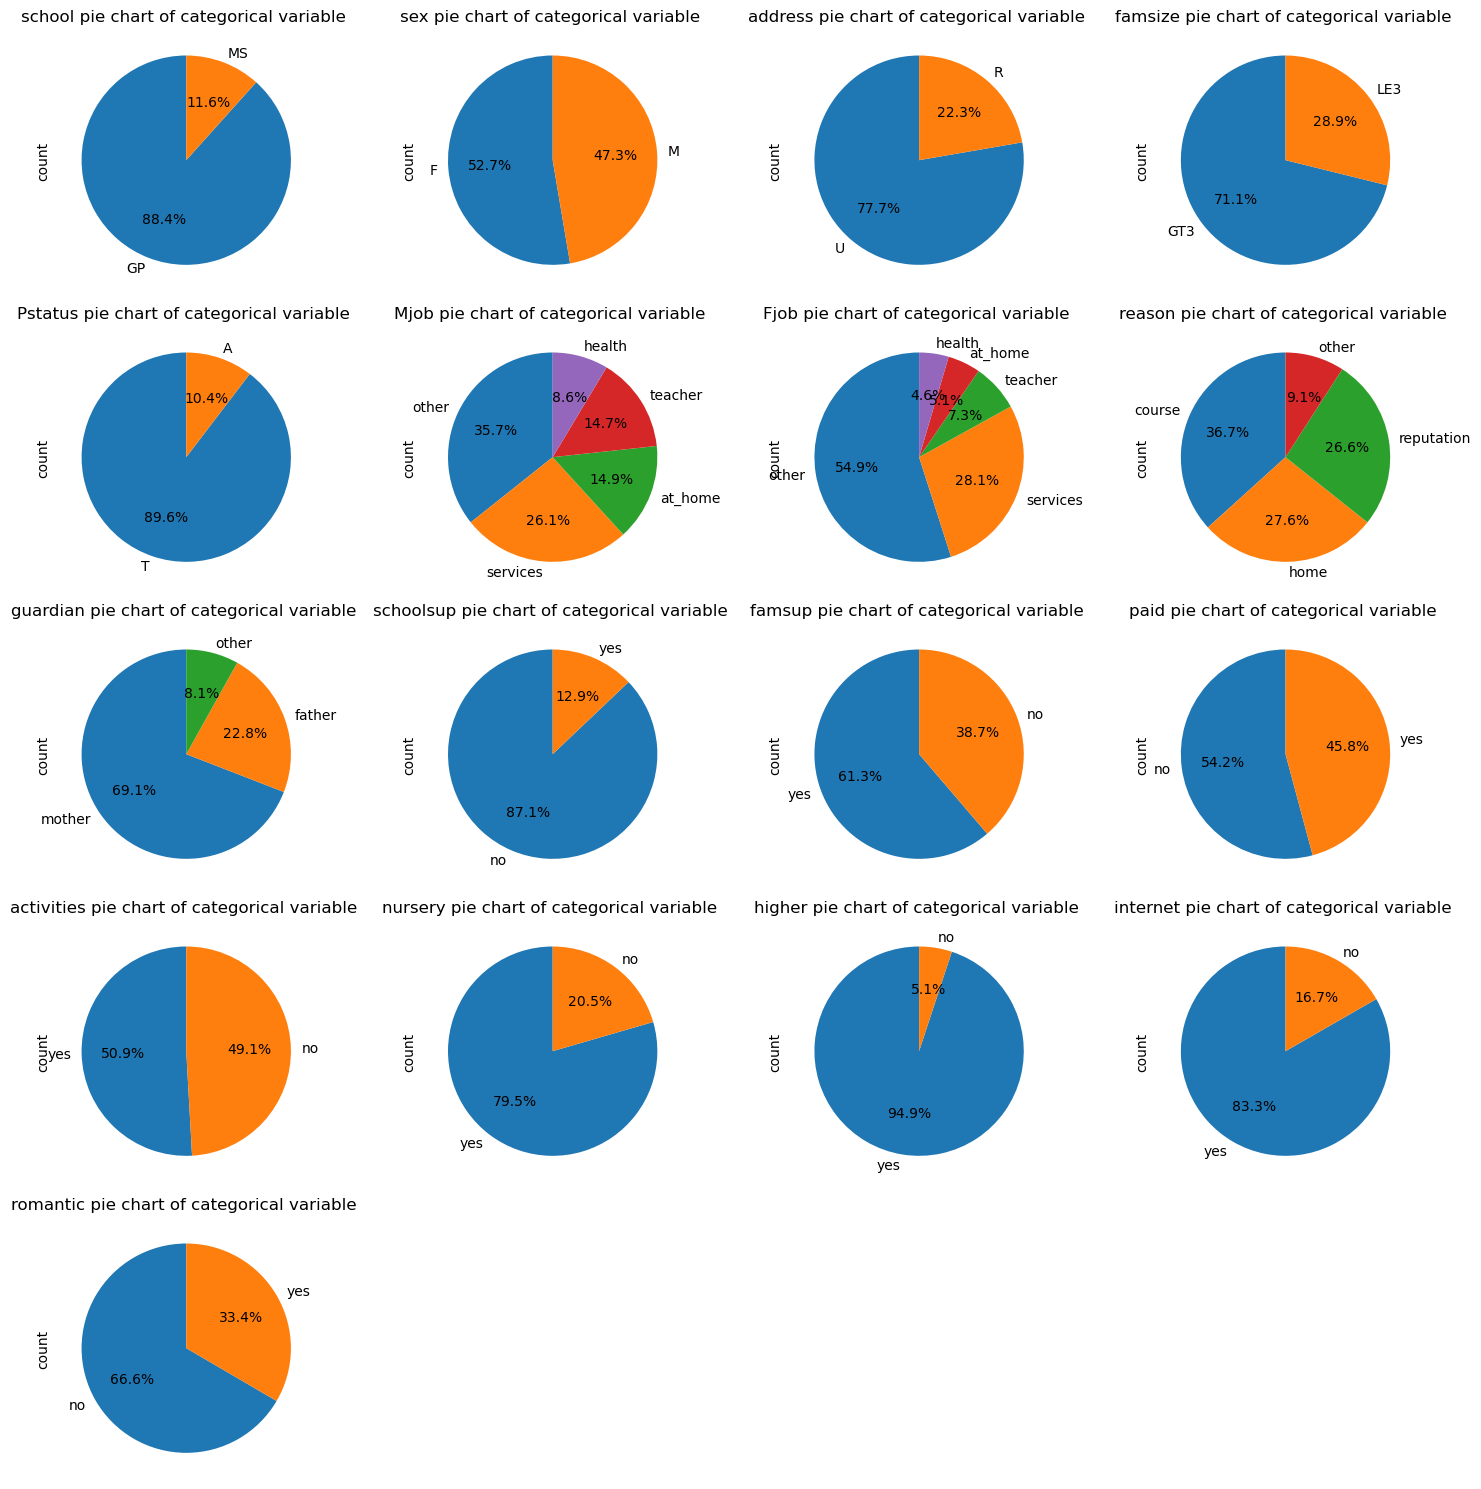

In [27]:
plt.figure(figsize=(15,15))
for i, cols in enumerate(Categorical_columns,start=1):
    plt.subplot(5,4,i)
    df[cols].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('{} pie chart of categorical variable '.format(cols))
plt.tight_layout()

- Here we got all the categorical variables with their percentage share
- Most of the feature are not normally distributed only few of them are normally disrtibuted 

# Numerical data

In [28]:
numerical_data = df.select_dtypes(include = ['int64']).columns

In [29]:
numerical_data

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

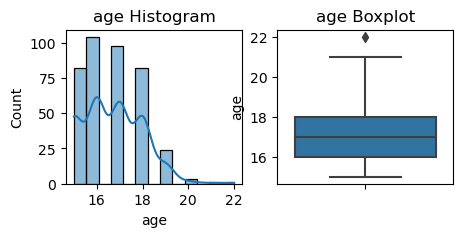

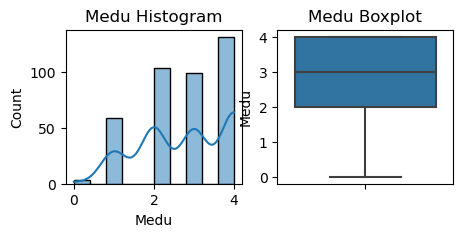

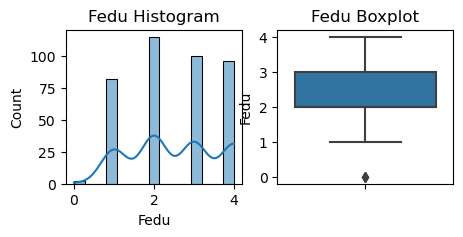

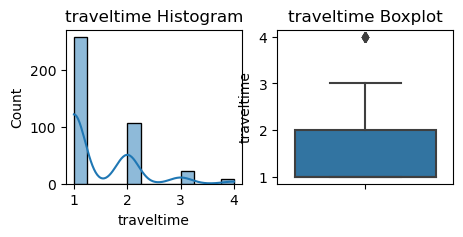

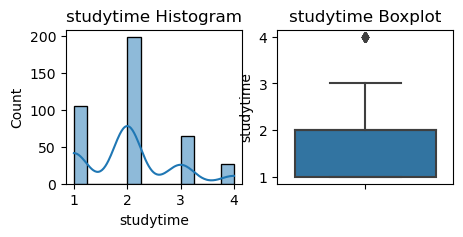

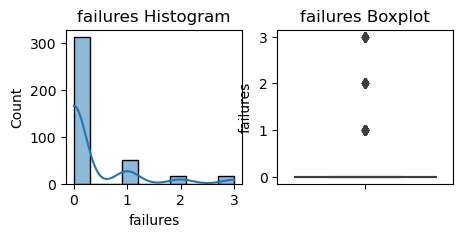

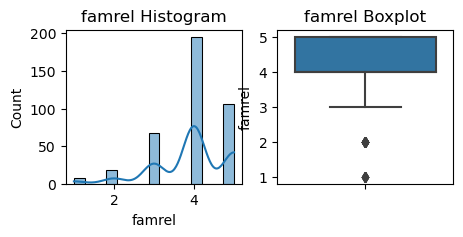

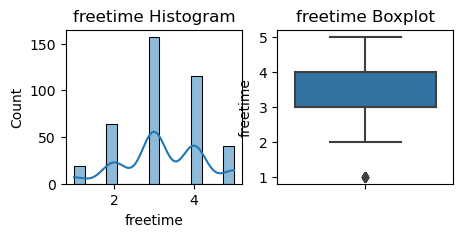

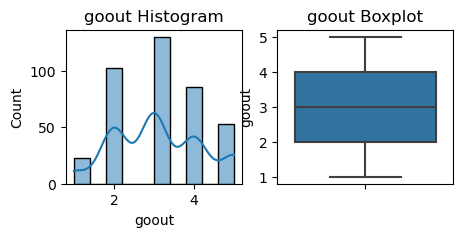

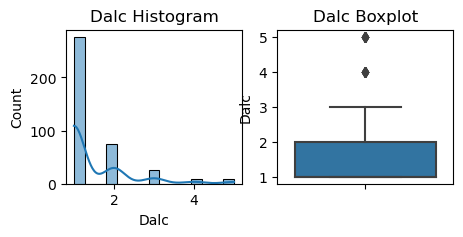

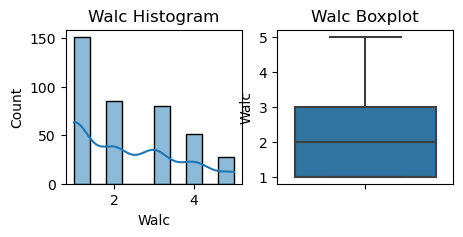

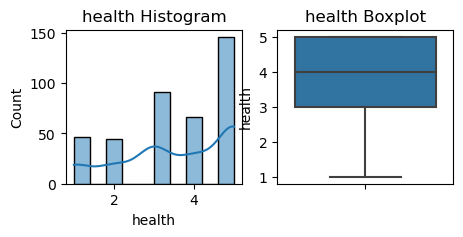

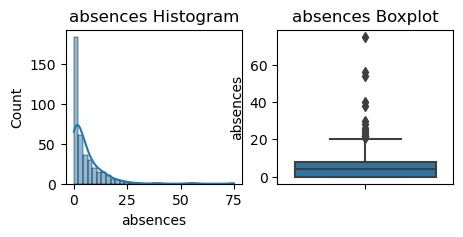

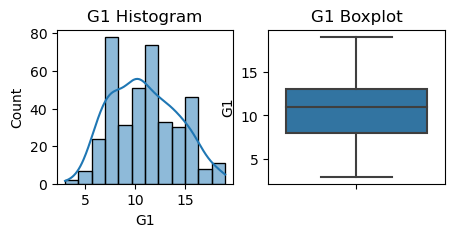

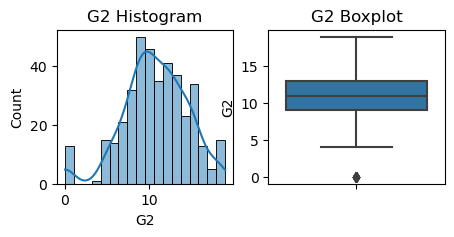

In [224]:
def get_plots(dta,variables):
    #histogram
    plt.figure(figsize=(5, 2))
    plt.subplot(1,2,1)
    sns.histplot(x=dta[variables],kde = True)
    plt.title("{} Histogram".format(variables))
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y = dta[variables])
    plt.title("{} Boxplot".format(variables))
   
    
for cols in numerical_data[:-1]:
    
    get_plots(df,cols)    
    

- Here we have visualized all the numerical variable with histogram and boxplot 

#### Here we will be taking the average of the G1,G2,G3 and naming that column as Average

In [82]:
df['Average'] = df["G1"]+df['G2']+df['G3']/3

In [83]:
df['Average']

0      13.000000
1      12.000000
2      18.333333
3      34.000000
4      19.333333
         ...    
390    21.000000
391    35.333333
392    20.333333
393    26.333333
394    20.000000
Name: Average, Length: 395, dtype: float64

In [225]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,13.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,12.0


- New column named Average has been added to the data frame.

# Exploring Data ( Visualization )
## Visualize average score distribution to make some conclusion.
- Histogram
- Barplot
- Kernel Distribution Function (KDE)

<Axes: xlabel='sex', ylabel='Average'>

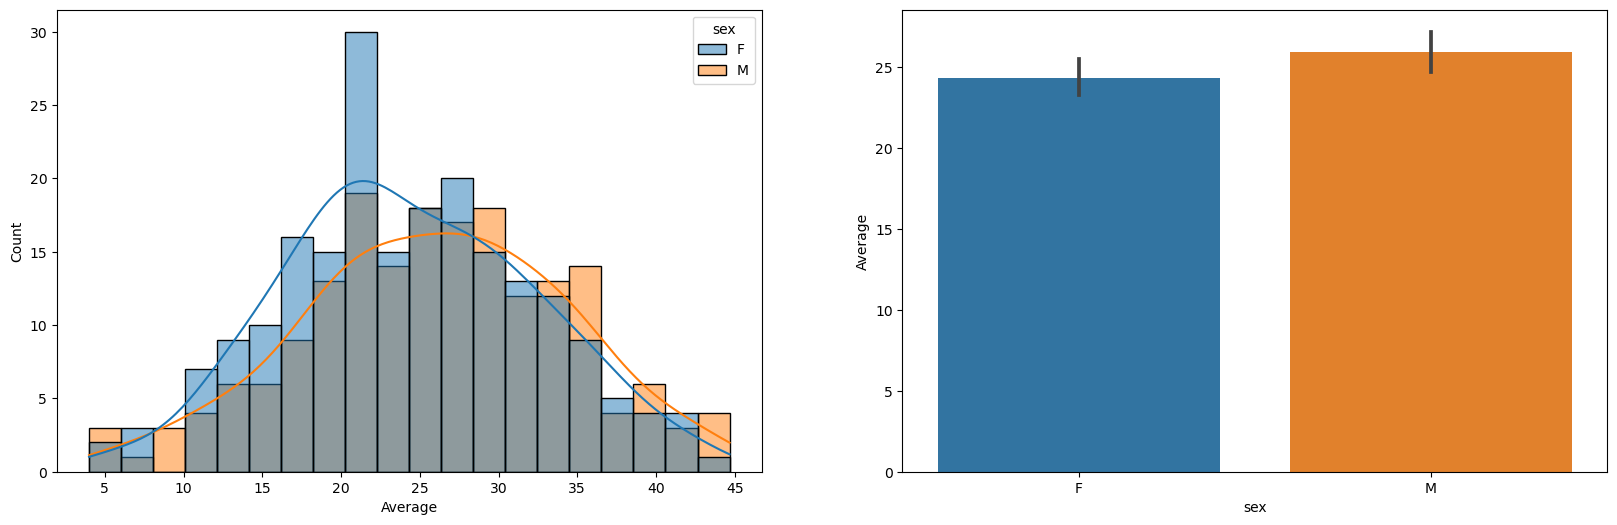

In [234]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='Average',hue = 'sex',data = df,kde =True,bins = 20)
plt.subplot(1,2,2)
sns.barplot(x='sex',y='Average',data = df)

### Insides
- Females students tend to perform well than males
- Most grades are scored by a male student 

<Axes: xlabel='internet', ylabel='Average'>

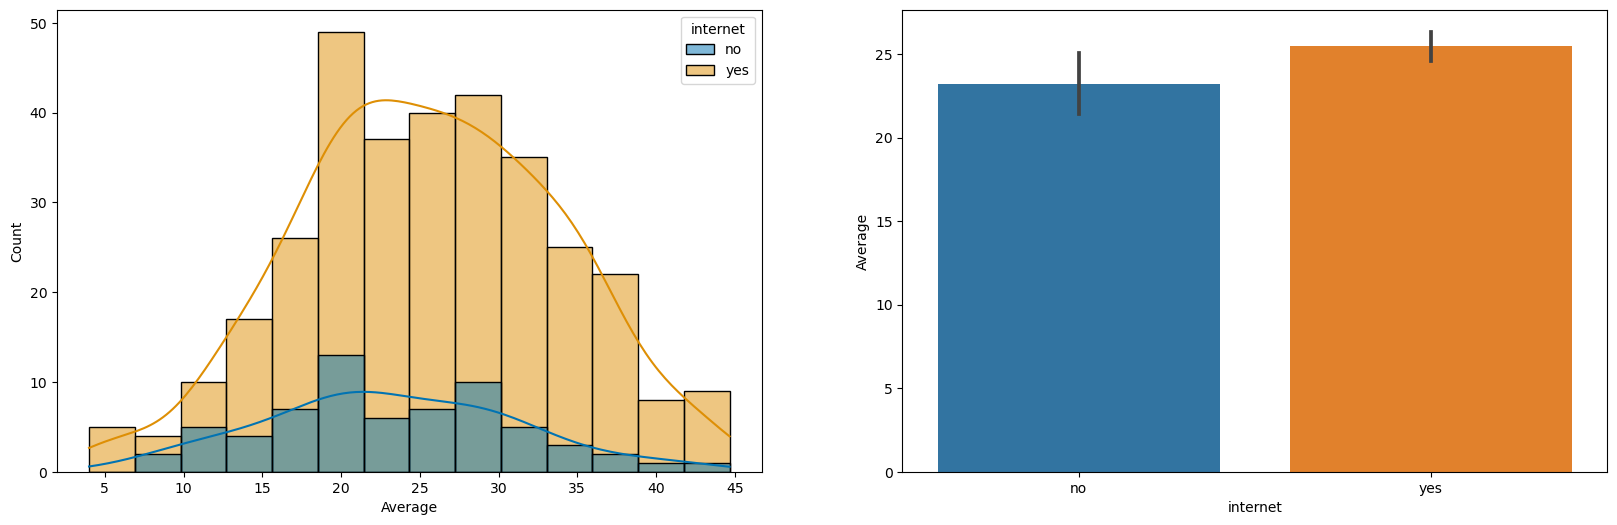

In [232]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(hue = "internet",x = "Average",data = df,kde = True,palette='colorblind')
plt.subplot(1,2,2)
sns.barplot(y='Average',x = 'internet',data = df)

### insides
- Students who are having internet connection are having more average grades as compare to the students who are not having internet connection 

In [86]:
df["sex"].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [87]:
females = df["sex"].value_counts()[0]
males = df["sex"].value_counts()[1]
total_students = df["sex"].value_counts().sum()
print('females',females)
print('males',males)

females 208
males 187


In [89]:
df[df['sex']=='M']['Average'].mean()

25.94295900178253

In [90]:
df[df['sex']=='F']['Average'].mean()

24.33173076923077

In [91]:
df['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

<Axes: xlabel='studytime', ylabel='Average'>

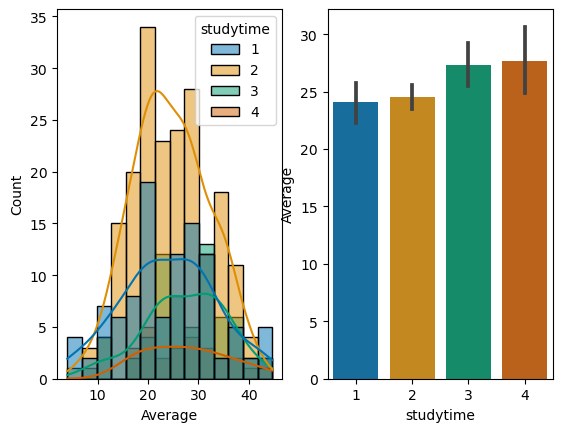

In [194]:
plt.subplot(1,2,1)
sns.histplot(hue = "studytime",x = "Average",data = df,palette='colorblind',kde = True)
plt.subplot(1,2,2)
sns.barplot(x = "studytime",y = "Average",data = df,palette='colorblind')

### Insides 
- Those who are having study time equals to 2 are having significantly better grades in comparesion to other students
- But the student who scored tha most grades is having a studytime equal to 4

<Axes: xlabel='Average', ylabel='Count'>

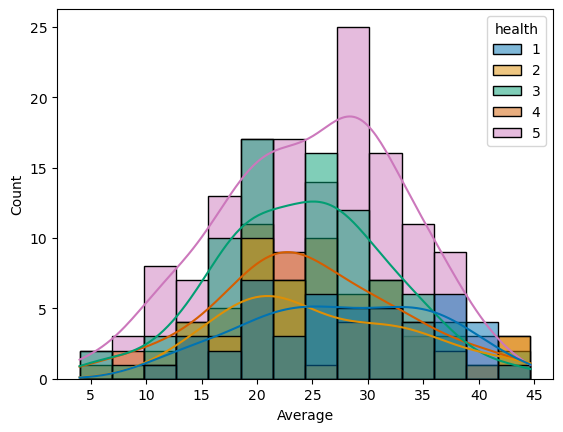

In [235]:
sns.histplot(hue='health',x = "Average",data = df,kde = True,palette='colorblind')

<Axes: xlabel='absences', ylabel='Average'>

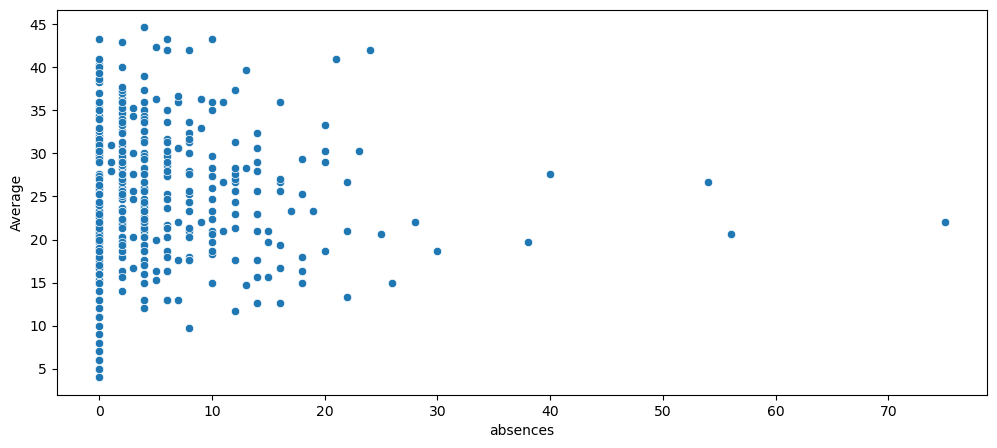

In [236]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="absences",y = 'Average',data = df)

- There is no relationship between average grades of the student with absences

In [237]:
df[df['Average']>44]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,1,1,2,4,19,19,20,44.666667


In [238]:
df[df['Average']==4.000000]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
137,GP,F,16,U,GT3,A,3,3,other,other,...,3,2,1,1,5,0,4,0,0,4.0


-  Most grades are scored by a male student with an average of 44.67 
- Least grades are scored by a Feamle student with an average of 4.0

## Does Famsize has any impact on average marks? We have to keep in mind that Famsize is not normally distributed.

<Axes: xlabel='Average', ylabel='Count'>

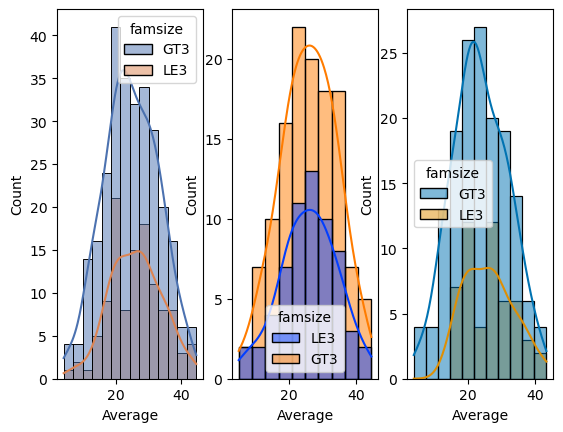

In [195]:
plt.subplot(1,3,1)
sns.histplot(x = "Average",data = df,hue ='famsize',palette = 'deep',color = 'r',kde = True)
plt.subplot(1,3,2)
sns.histplot(x='Average',data = df[df['sex']=='M'],hue = 'famsize',palette = 'bright',kde = True)

plt.subplot(1,3,3)
sns.histplot(x='Average',data = df[df['sex']=='F'],hue = 'famsize',palette = 'colorblind',kde = True)


## Insides 
 - Here we can see that there is a effect of famsize on the average marks 
 - famsize=GT3 are having more average marks as compare to famsize = LE3
 - It is same in both males and females 

## Checking impact of p status on average 
- Note** Pstatus is also not normally distributed 

<Axes: xlabel='Average', ylabel='Count'>

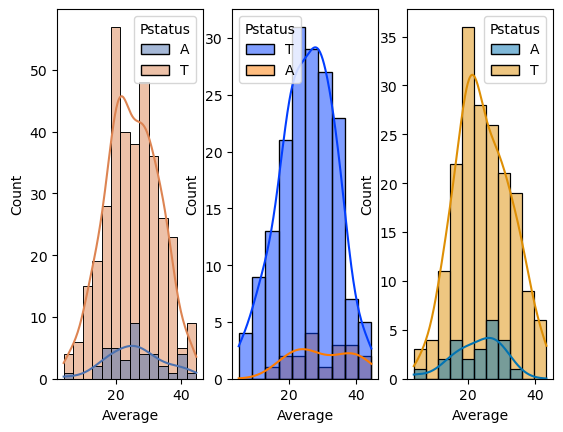

In [196]:
plt.subplot(1,3,1)
sns.histplot(x = "Average",data = df,hue ='Pstatus',palette = 'deep',color = 'r',kde = True)
plt.subplot(1,3,2)
sns.histplot(x='Average',data = df[df['sex']=='M'],hue = 'Pstatus',palette = 'bright',kde = True)

plt.subplot(1,3,3)
sns.histplot(x='Average',data = df[df['sex']=='F'],hue = 'Pstatus',palette = 'colorblind',kde = True)


<Axes: xlabel='Average', ylabel='Count'>

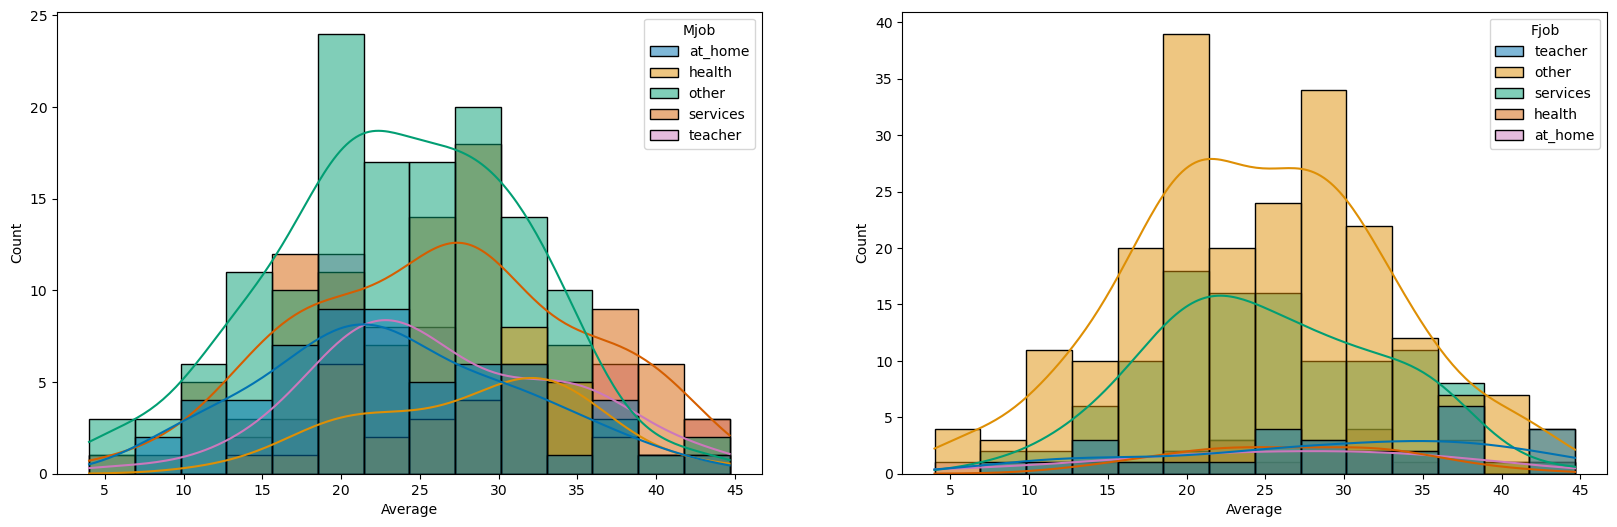

In [239]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x = 'Average',hue = 'Mjob',data = df,kde = True,palette='colorblind')
plt.subplot(1,2,2)
sns.histplot(x = 'Average',hue = 'Fjob',data = df,kde = True,palette='colorblind')


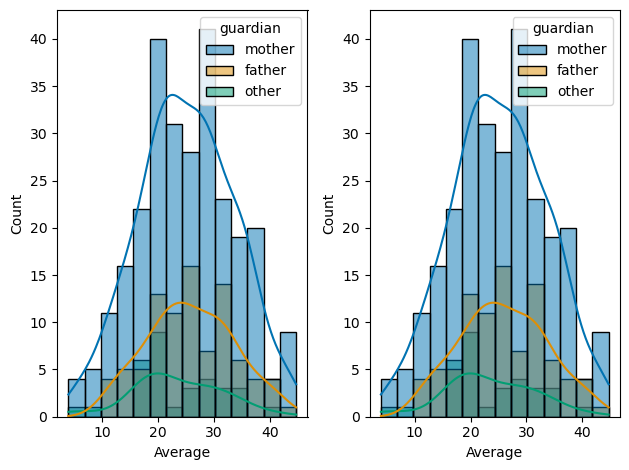

In [219]:
plt.subplot(1,2,1)
sns.histplot(x = 'Average',hue = 'guardian',data = df,kde = True,palette='colorblind')
plt.subplot(1,2,2)
sns.histplot(x = 'Average',hue= 'guardian',data = df,kde = True,palette='colorblind')
plt.tight_layout()

### Insides 
- Students who have mother as a guardian are having good grades buut we have to keep in mind that the data of gurdian is not normaly distributed this could be the reason that there is a significant difference in the averages of the students

<Axes: xlabel='Average', ylabel='Count'>

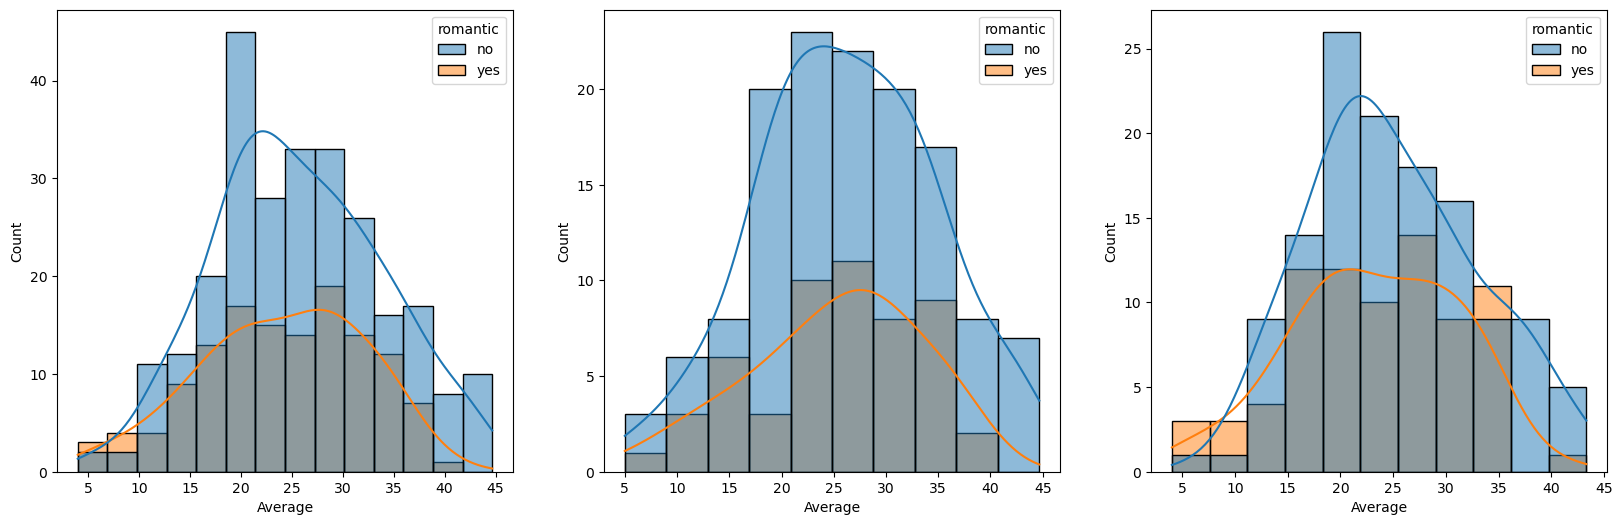

In [241]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.histplot(hue = 'romantic',x = 'Average',data = df,kde = True)
plt.subplot(1,3,2)
sns.histplot(hue = 'romantic',x = 'Average',data = df[df['sex']=='M'],kde = True)
plt.subplot(1,3,3)
sns.histplot(hue = 'romantic',x = 'Average',data = df[df['sex']=='F'],kde = True)


### Insides 
- Students who are not having any romantic realationship are having good grades.
- It is same with both male and females students

<Axes: xlabel='Average', ylabel='Count'>

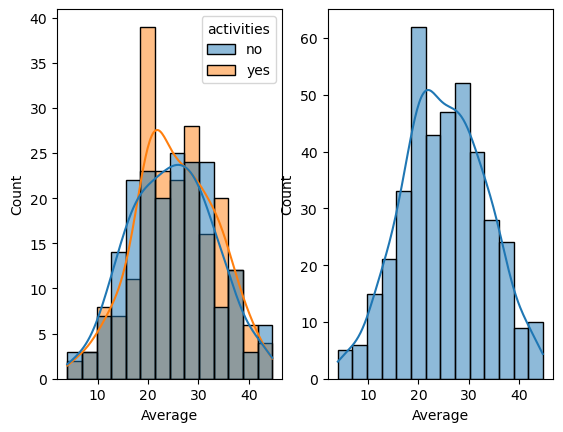

In [155]:
plt.subplot(1,2,1)
sns.histplot(x='Average',data = df,hue = 'activities',kde = True)
plt.subplot(1,2,2)
sns.histplot(x= 'Average',data = df,kde = True)

### Insides 
-  Students who are involved in activities are performing better.

<Axes: xlabel='Average', ylabel='Count'>

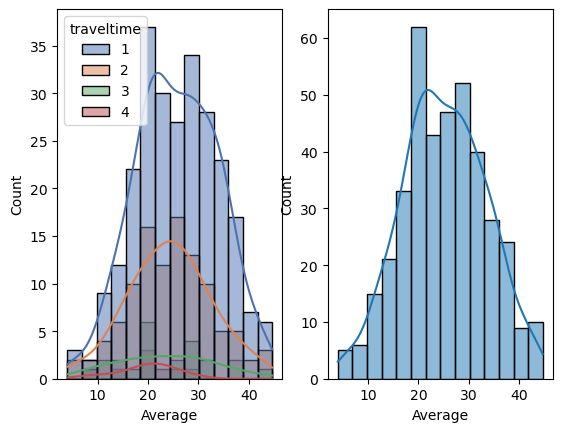

In [183]:
plt.subplot(1,2,1)
sns.histplot(x='Average',data = df,hue = 'traveltime',kde = True,palette='deep')
plt.subplot(1,2,2)
sns.histplot(x= 'Average',data = df,kde = True)

### Insides 
- students with Less travel time are having more grades. 

<Axes: xlabel='freetime', ylabel='Average'>

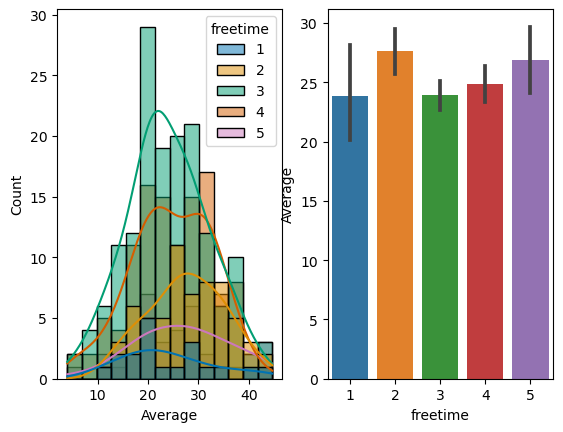

In [242]:
plt.subplot(1,2,1)
sns.histplot(x='Average',data = df,hue = 'freetime',kde = True,palette='colorblind')
plt.subplot(1,2,2)
sns.barplot(y= 'Average',x = 'freetime',data = df)

<Axes: xlabel='reason', ylabel='Average'>

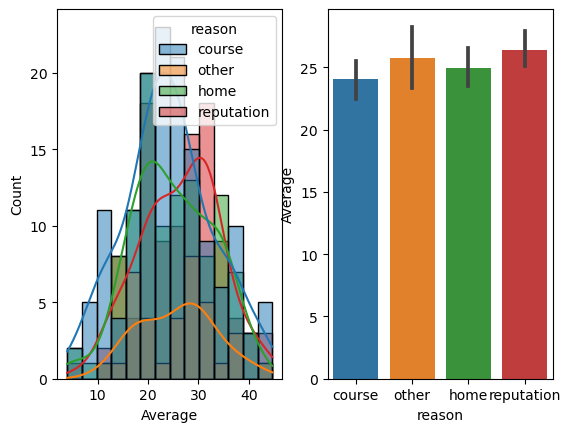

In [243]:
plt.subplot(1,2,1)
sns.histplot(x = 'Average',hue = 'reason',data = df ,kde = True)
plt.subplot(1,2,2)
sns.barplot(x= 'reason',y= 'Average',data = df)

In [245]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,13.000000
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,12.000000
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,18.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,34.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,19.333333


In [246]:
dataset = sorted(df)

In [248]:

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,13.000000
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,12.000000
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,18.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,34.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,19.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,21.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,35.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,20.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,26.333333
